In [18]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = 'C:\\Users\\0920b\\Downloads\\'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
#list(df_train.head())




In [19]:
train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
#df.dtypes.value_counts()


In [20]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
num_features = df.select_dtypes(exclude=['object'])
#print(num_features)
#num_features.shape
#for dtype, feature in zip(df.dtypes, df.columns):
#    if dtype == 'float64' or dtype == 'int64':
#        num_features.append(feature)
#print(f'{len(num_features)} Numeric Features : {num_features}\n')
#num_features.shape()

In [21]:
# 削減文字型欄位, 只剩數值型欄位
df = num_features.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
print(train_num)

1460


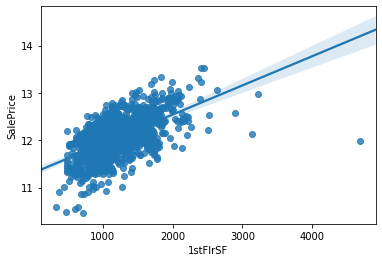

In [22]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()



In [23]:
# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8499683837163878

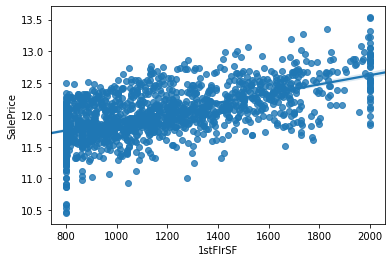

In [24]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
df['1stFlrSF'] = df['1stFlrSF'].clip(800, 2000)
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()



In [25]:
# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8511426251393648

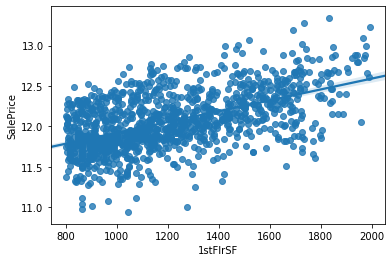

In [26]:
# 將 1stFlrSF 限制在 800 到 2500 以內, 捨棄離群值
keep_indexs = (df['1stFlrSF']> 800) & (df['1stFlrSF']< 2000)
df = df[keep_indexs]
train_Y = train_Y[keep_indexs]
sns.regplot(x = df['1stFlrSF'], y=train_Y)
plt.show()


In [27]:
# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8871571447420115

使用'捨棄離群值' 的方法, 回歸的結果變好了。
我認為一樓樓層面積的離群值，在針對固定數值範圍修正後，離群值將會直接歸入範圍的上下限，但事實上該面積並非販售該價格，放進模型中考慮會影響模型的真實性。